In [ ]:
# pip install yfinance

In [1]:
import yfinance as yf
from datetime import datetime, timedelta

# Calculate the start date (10 years from today)
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 10)  # Approximate 10 years

# Convert to strings in 'YYYY-MM-DD' format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# Take stock ticker as user input
ticker = input("Enter the stock: ").strip()

# Download data for the last 10 years
df1 = yf.download(ticker, start=start_date_str, end=end_date_str)


Enter the stock: MSFT


[*********************100%%**********************]  1 of 1 completed


In [2]:
# Displaying the data
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-26,48.410000,48.410000,47.820000,47.880001,41.114223,13197800
2014-12-29,47.700001,47.779999,47.259998,47.450001,40.744968,14439500
2014-12-30,47.439999,47.619999,46.840000,47.020000,40.375751,16384700
2014-12-31,46.730000,47.439999,46.450001,46.450001,39.886292,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.152481,27913900
...,...,...,...,...,...,...
2024-12-16,447.269989,452.179993,445.279999,451.589996,451.589996,23598800
2024-12-17,451.010010,455.290009,449.570007,454.459991,454.459991,22733500
2024-12-18,451.320007,452.649994,437.019989,437.390015,437.390015,24444500


In [3]:
# Checking null values
df1.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-26,False,False,False,False,False,False
2014-12-29,False,False,False,False,False,False
2014-12-30,False,False,False,False,False,False
2014-12-31,False,False,False,False,False,False
2015-01-02,False,False,False,False,False,False
...,...,...,...,...,...,...
2024-12-16,False,False,False,False,False,False
2024-12-17,False,False,False,False,False,False
2024-12-18,False,False,False,False,False,False


In [4]:
# Getting information
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2014-12-26 to 2024-12-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2514 non-null   float64
 1   High       2514 non-null   float64
 2   Low        2514 non-null   float64
 3   Close      2514 non-null   float64
 4   Adj Close  2514 non-null   float64
 5   Volume     2514 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.5 KB


In [5]:
# Describing every things
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,186.849232,188.630931,184.986221,186.896464,181.186672,2.889696e+07
std,122.475031,123.551719,121.305569,122.481858,123.438921,1.335424e+07
min,40.340000,40.740002,39.720001,40.290001,34.691193,7.425600e+06
25%,70.507500,70.887503,69.882502,70.342501,64.503685,2.062760e+07
50%,151.449997,153.455002,150.300003,151.724998,145.122757,2.573265e+07
75%,282.947495,286.402512,279.402496,282.500008,276.499611,3.316560e+07
max,467.000000,468.350006,464.459991,467.559998,465.786438,1.691640e+08


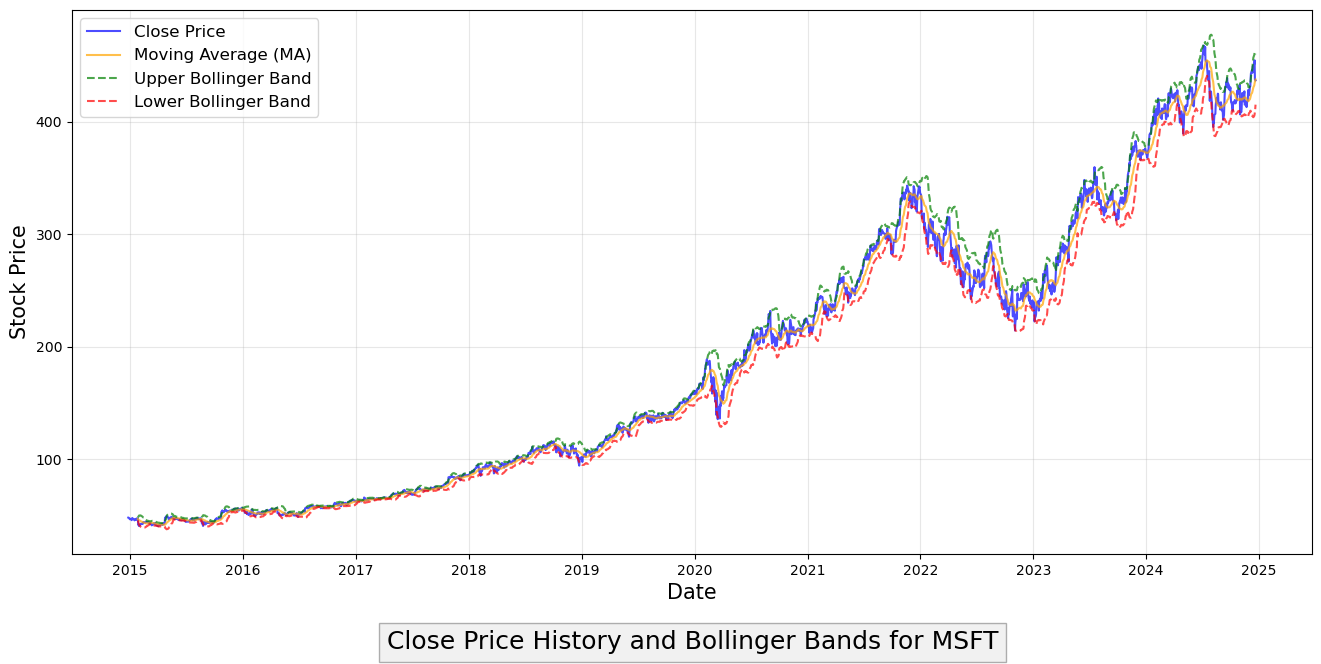

In [6]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
# Ensure data was downloaded
if df1.empty:
    print("No data found for the given ticker.")
else:
    # Calculate Bollinger Bands
    window = 20  # Default window size for Bollinger Bands
    df1['MA'] = df1['Close'].rolling(window=window).mean()  # Moving Average
    df1['STD'] = df1['Close'].rolling(window=window).std()  # Standard Deviation
    df1['Upper Band'] = df1['MA'] + (df1['STD'] * 2)         # Upper Bollinger Band
    df1['Lower Band'] = df1['MA'] - (df1['STD'] * 2)         # Lower Bollinger Band

    # Plot the data
    df1['Date'] = pd.to_datetime(df1.index)
    plt.figure(figsize=(16, 8))

    # Plot Closing Price
    plt.plot(df1['Date'], df1['Close'], label='Close Price', color='blue', alpha=0.7)

    # Plot Bollinger Bands
    plt.plot(df1['Date'], df1['MA'], label='Moving Average (MA)', color='orange', alpha=0.7)
    plt.plot(df1['Date'], df1['Upper Band'], label='Upper Bollinger Band', color='green', linestyle='--', alpha=0.7)
    plt.plot(df1['Date'], df1['Lower Band'], label='Lower Bollinger Band', color='red', linestyle='--', alpha=0.7)

    # Add labels, and grid
    
    plt.xlabel("Date", size=15)
    plt.ylabel("Stock Price", size=15)
    plt.legend(loc='best', fontsize=12)
    plt.grid(alpha=0.3)
    
    # Adjust layout to allocate space for title at the bottom
    plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

    # Add title at the bottom with a square boundary
    plt.text(
        0.513, 0.09,  # Position below the graph
        f"Close Price History and Bollinger Bands for {ticker}",
        fontsize=18, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [8]:
# Converting the downloaded data into csv file
csv_filename = f"{ticker}.csv"
df1.to_csv(csv_filename)
df = pd.read_csv(csv_filename)

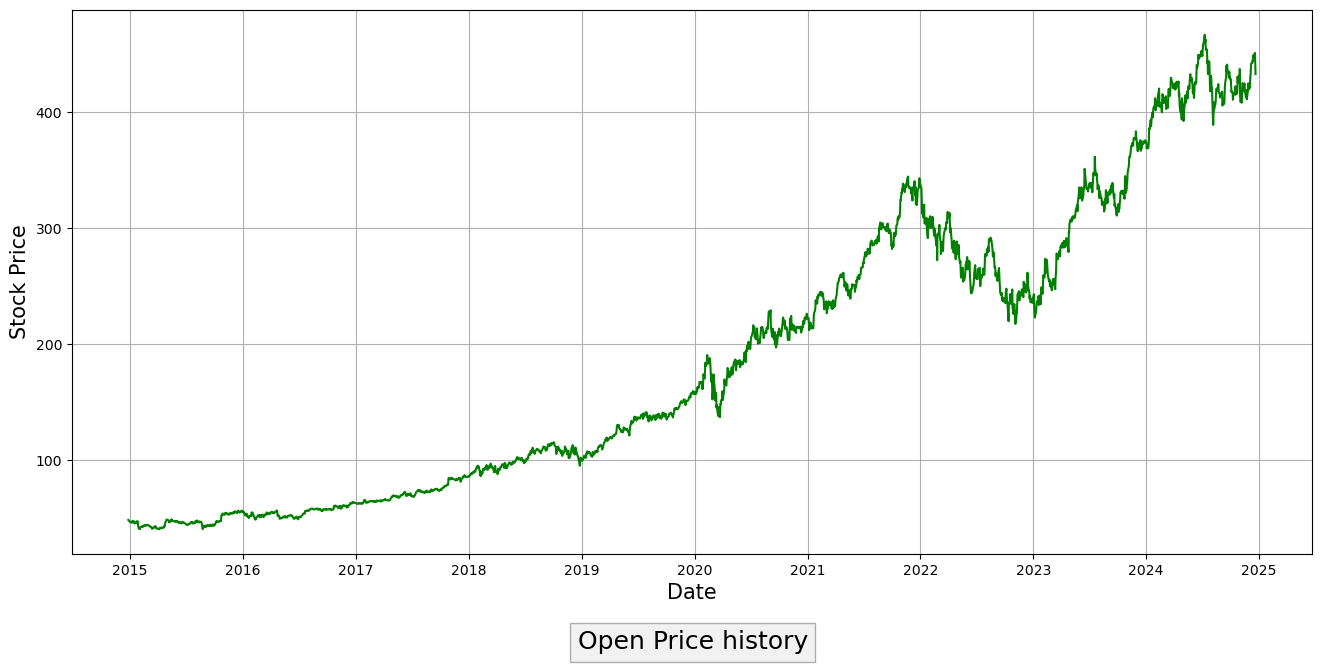

In [9]:
# Graph of Opening price of stock 
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='Open Price history',color='g')
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)

plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

# Add title at the bottom with a square boundary
plt.text(
        0.513, 0.09,  # Position below the graph
        "Open Price history",
        fontsize=18, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
plt.grid(True)

# Show the plot
plt.show()

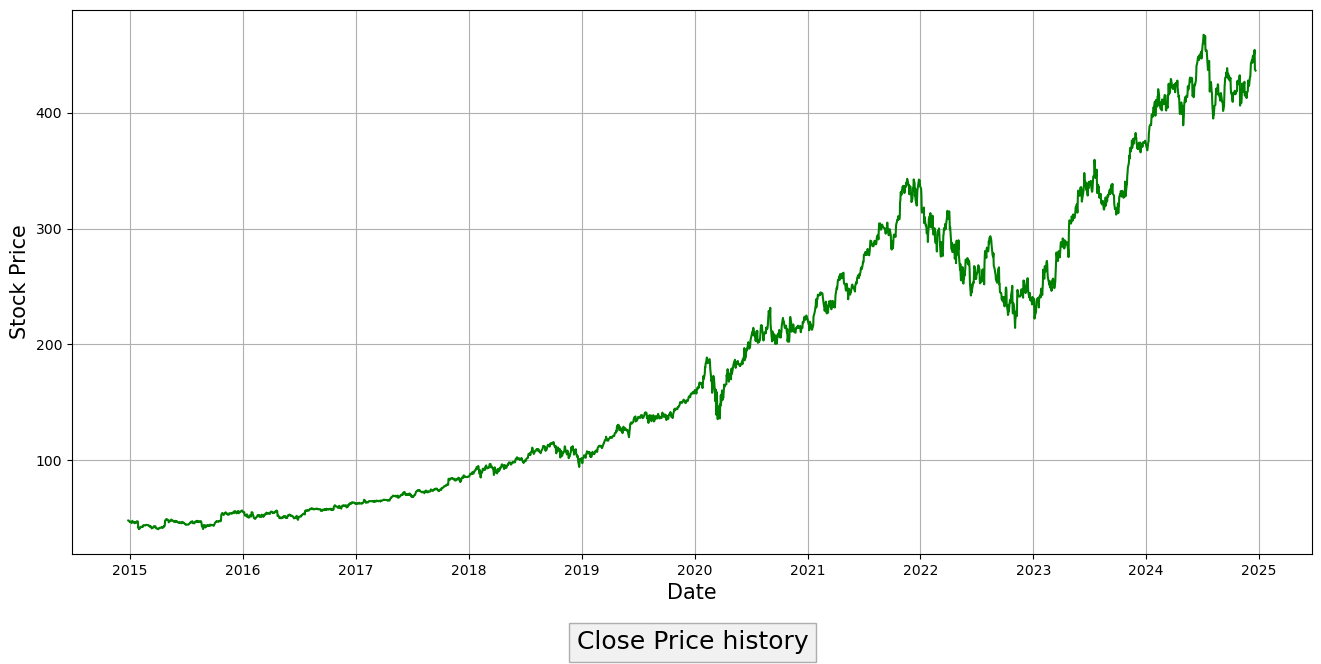

In [10]:
# Graph of Closing price of stock 
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)

plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

# Add title at the bottom with a square boundary
plt.text(
        0.513, 0.09,  # Position below the graph
        "Close Price history",
        fontsize=18, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
plt.grid(True)

# Show the plot
plt.show()

In [11]:
# Correlation of data
correlation = df1.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume,MA,STD,Upper Band,Lower Band,Date
Open,1.000000,0.999885,0.999869,0.999720,0.999646,-0.177408,0.998199,0.778319,0.997529,0.997316,0.959719
High,0.999885,1.000000,0.999840,0.999862,0.999776,-0.172970,0.998298,0.780274,0.997740,0.997291,0.960351
Low,0.999869,0.999840,1.000000,0.999881,0.999817,-0.182819,0.997949,0.776405,0.997177,0.997179,0.959289
Close,0.999720,0.999862,0.999881,1.000000,0.999918,-0.178550,0.997992,0.778061,0.997317,0.997115,0.959784
Adj Close,0.999646,0.999776,0.999817,0.999918,1.000000,-0.179673,0.997995,0.776958,0.997253,0.997191,0.959635
Volume,-0.177408,-0.172970,-0.182819,-0.178550,-0.179673,1.000000,-0.170139,0.053191,-0.158924,-0.182228,-0.167580
MA,0.998199,0.998298,0.997949,0.997992,0.997995,-0.170139,1.000000,0.779224,0.999299,0.999148,0.960891
STD,0.778319,0.780274,0.776405,0.778061,0.776958,0.053191,0.779224,1.000000,0.802140,0.752691,0.786794
Upper Band,0.997529,0.997740,0.997177,0.997317,0.997253,-0.158924,0.999299,0.802140,1.000000,0.996902,0.962490
Lower Band,0.997316,0.997291,0.997179,0.997115,0.997191,-0.182228,0.999148,0.752691,0.996902,1.000000,0.957567


<Axes: >

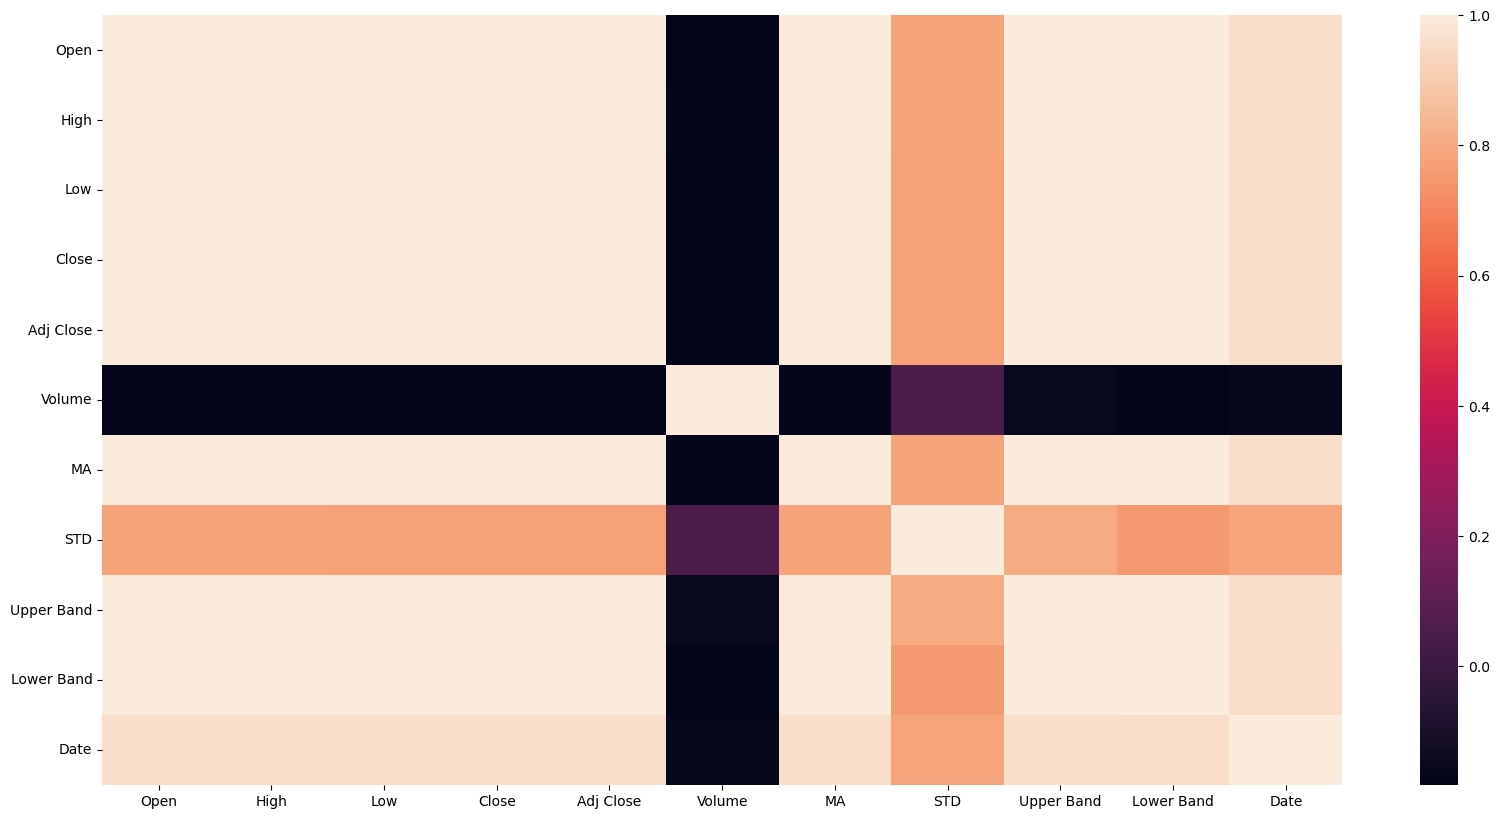

In [12]:
# Heatmap of correlation
import seaborn as sns
sns.heatmap(correlation)

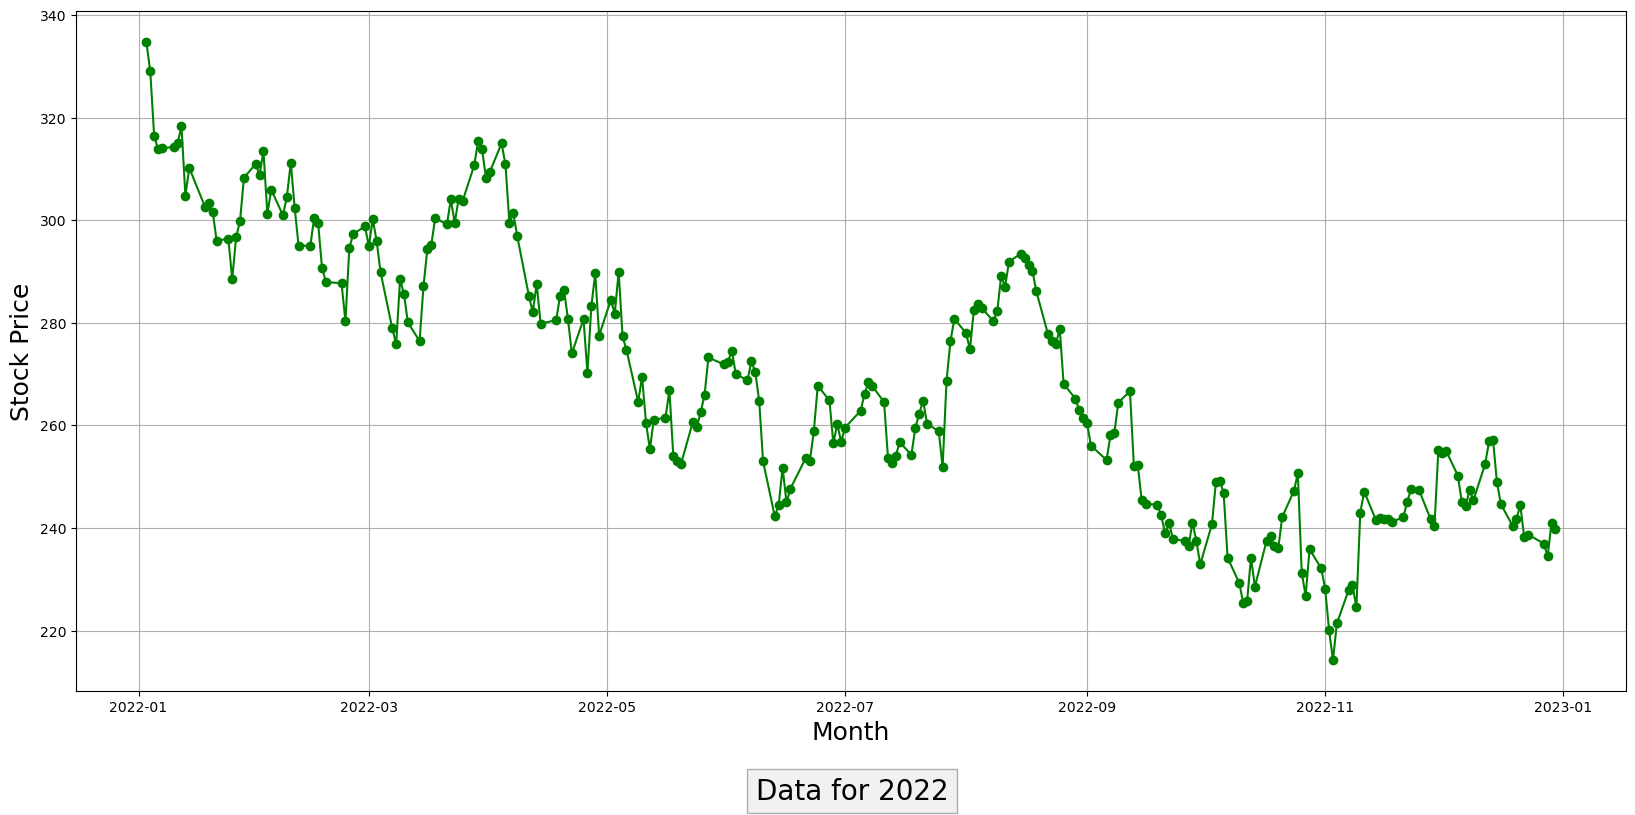

In [13]:
# Graph of 2022 closing price of stock 

df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter data for a single year
desired_year = datetime.today().year - 2
single_year_data = df[df['Year'] == desired_year]

# Plot the graph for a single year
plt.plot(single_year_data['Date'], single_year_data['Close'], marker='o', linestyle='-' , color='g')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)

plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

# Add title at the bottom with a square boundary
plt.text(
        0.513, 0.1,  # Position below the graph
        f'Data for {desired_year}',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
plt.grid(True)

# Show the plot
plt.show()

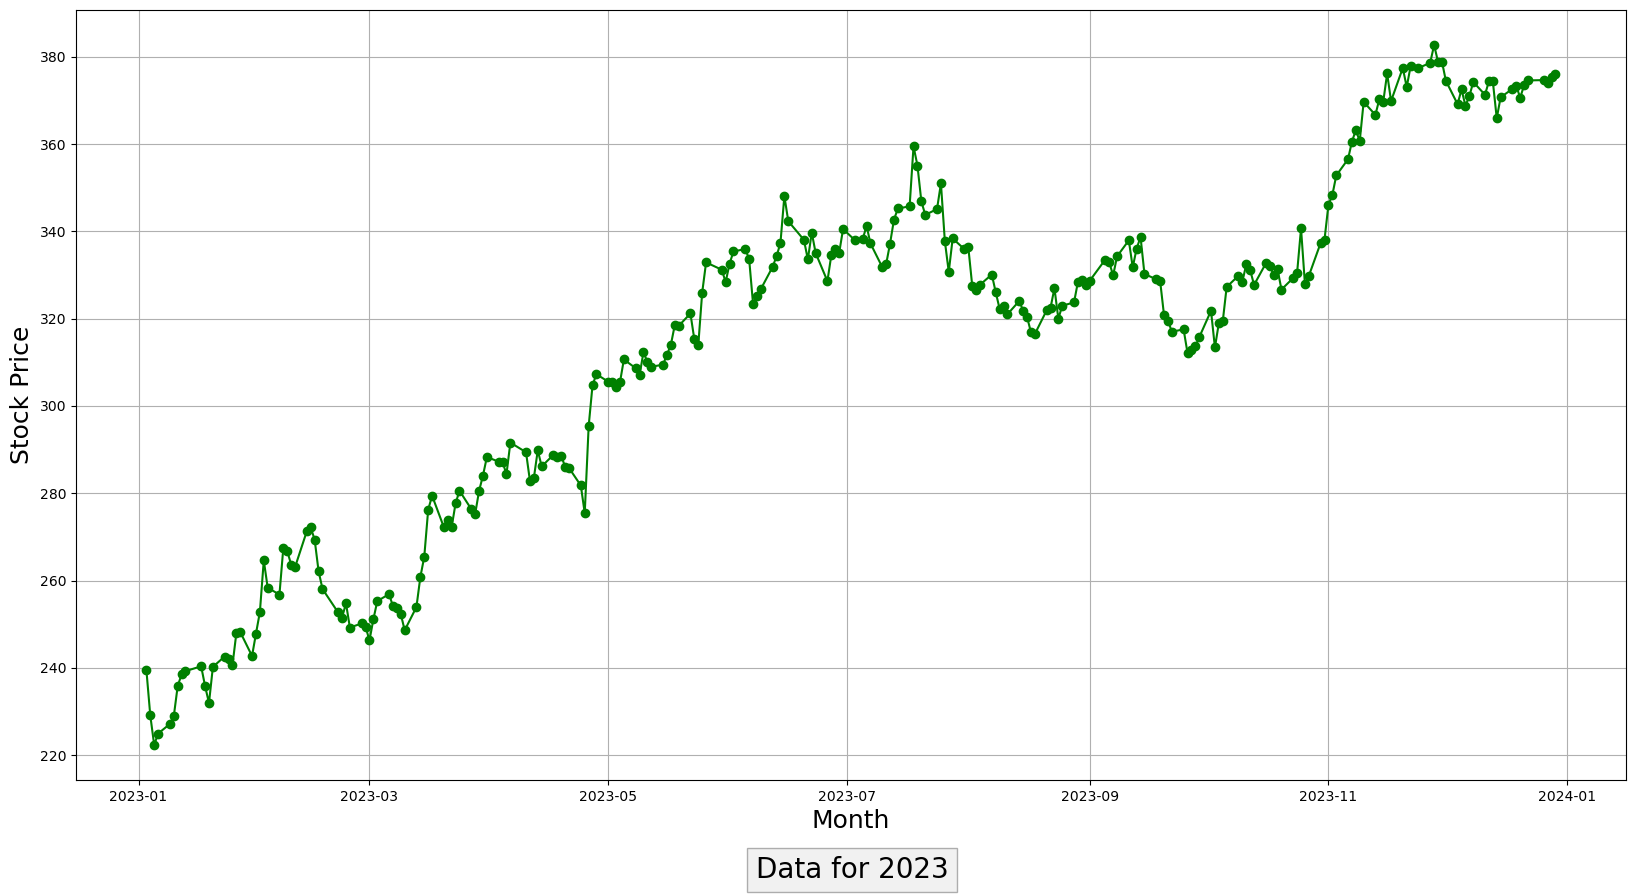

In [14]:
# Graph of 2022 closing price of stock 

df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter data for a single year
desired_year = datetime.today().year - 1
single_year_data = df[df['Year'] == desired_year]

# Plot the graph for a single year
plt.plot(single_year_data['Date'], single_year_data['Close'], marker='o', linestyle='-' , color='g')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.text(
        0.513, 0.02,  # Position below the graph
        f'Data for {desired_year}',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
plt.grid(True)

# Show the plot
plt.show()

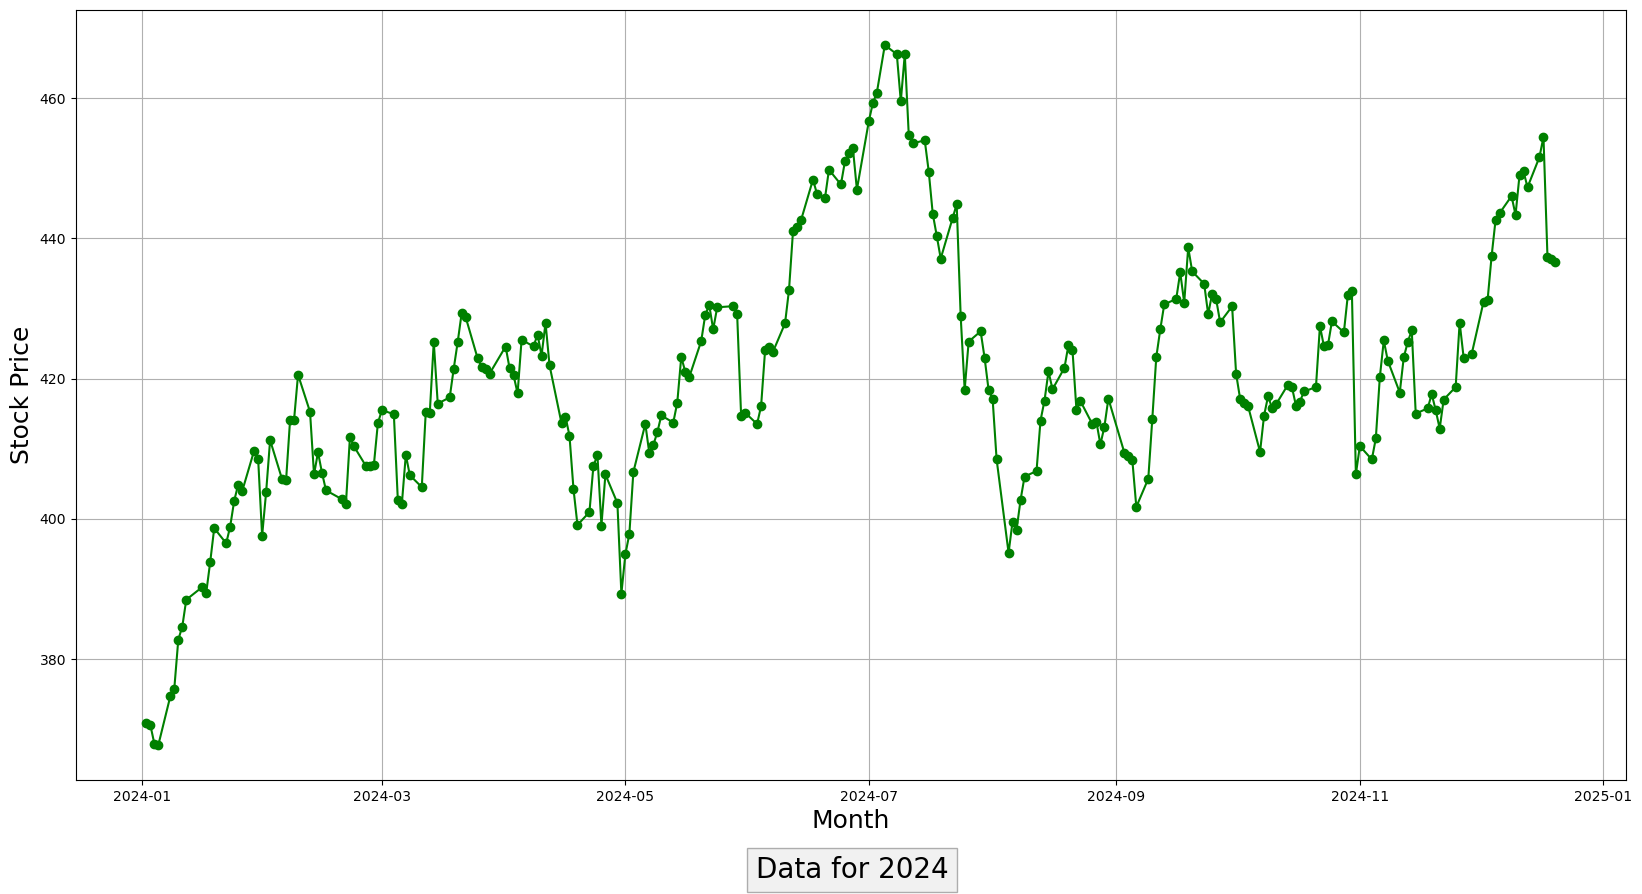

In [15]:
# Graph of 2022 closing price of stock 

df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter data for a single year
desired_year = datetime.today().year
single_year_data = df[df['Year'] == desired_year]

# Plot the graph for a single year
plt.plot(single_year_data['Date'], single_year_data['Close'], marker='o', linestyle='-' , color='g')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.text(
        0.513, 0.02,  # Position below the graph
        f'Data for {desired_year}',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
plt.grid(True)

# Show the plot
plt.show()

### Moving Average

In [16]:
def moving_avg_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using moving average
    print('-----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('-----------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    
    # Calculate predictions using moving average
    preds = []
    for i in range(0, valid_set.shape[0]):
        # Calculate moving average
        a = train_set['Close'][len(train_set) - valid_set.shape[0] + i:].sum() + sum(preds)
        b = a / (valid_set.shape[0])
        preds.append(b)
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Close']) - preds), 2)))
    
    # Print RMSE value on validation set
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Add 'Predictions' column to the validation set DataFrame
    valid_set['Predictions'] = preds
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date', size=15)
    plt.ylabel('Stock Price', size=15)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    
    #Add Title
    plt.text(
        0.513, 0.02,  # Position below the graph
        'Stock Price Prediction by Moving Averages',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
    # Display the validation set DataFrame
    print(valid_set)
    
    # Show the plot
    plt.show()


-----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------
-----------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
RMSE value on validation set: 100.70025541143393
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2022-06-24  267.700012   243.916210
2022-06-27  264.890015   244.051952
2022-06-28  256.480011   244.187449
2022-06-29  260.260010   244.325343
2022-06-30  256.829987   244.463282
...                ...          ...
2024-12-16  451.589996   266.998893
2024-12-17  454.459991   267.033971
2024-12-18  437.390015   267.064837
2024-12-19  437.029999   267.086055
2024-12-20  436.600006   267.108278

[628 rows x 2 columns]


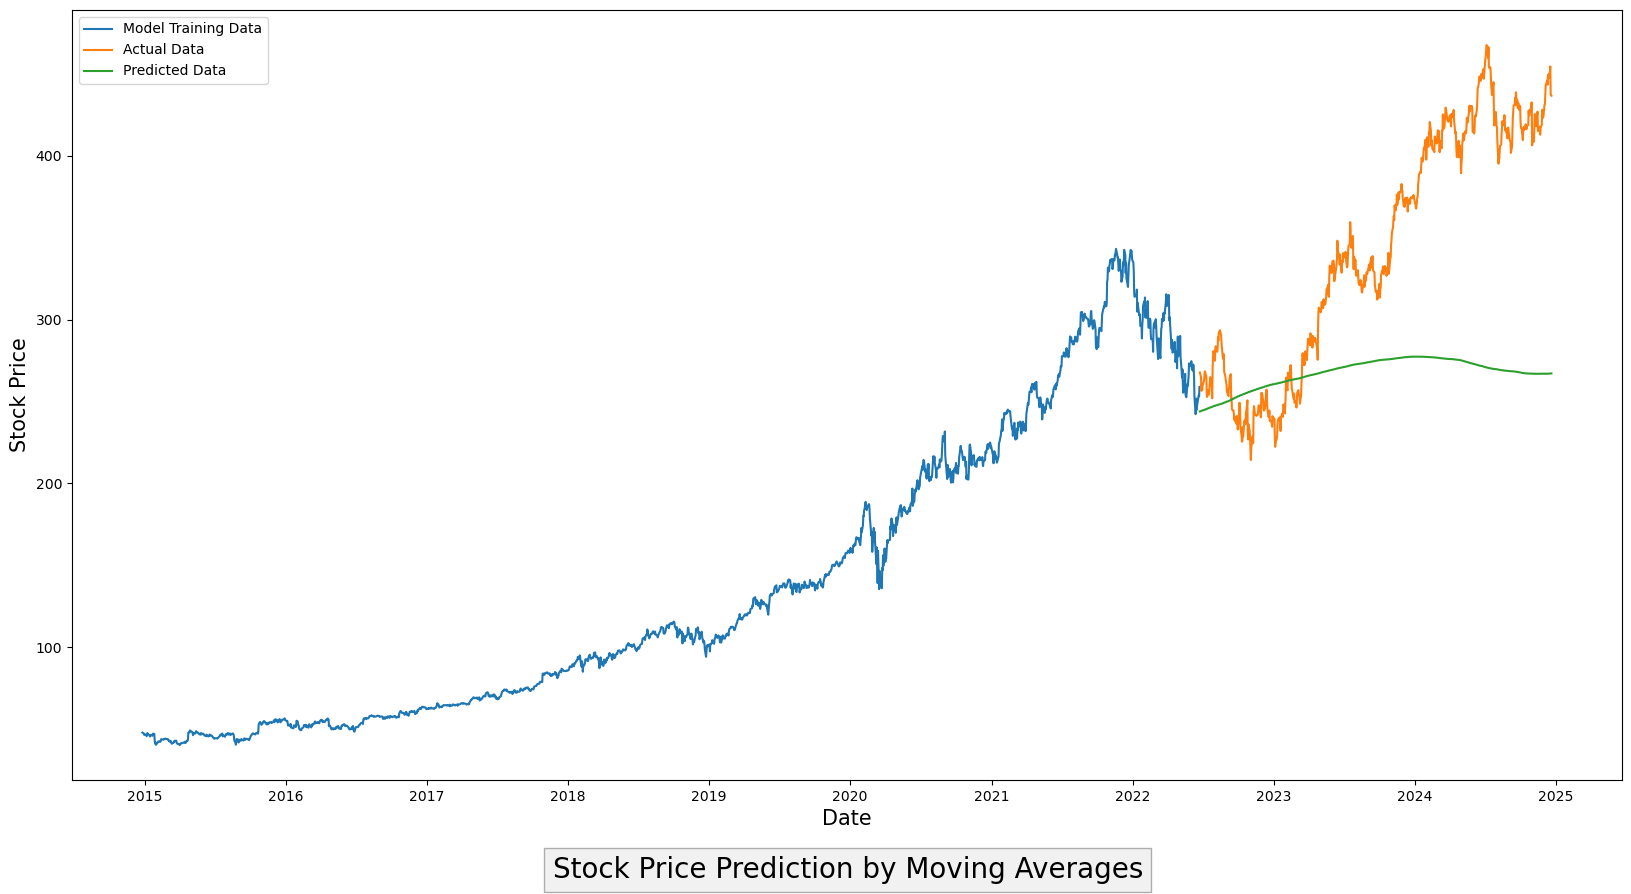

In [17]:
# Call the moving_avg_prediction function with the DataFrame 'df'
moving_avg_prediction(df)

### Linear Regression

In [18]:
def linear_regression_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using linear regression
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    
    # Reset index for training and validation sets
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    
    # Convert dates to ordinal values
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    
    # Implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1), y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Close']) - preds), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Add 'Predictions' column to the validation set DataFrame
    valid_set['Predictions'] = preds
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    
    #Add Title
    plt.text(
        0.513, 0.02,  # Position below the graph
        'Stock Price Prediction by Linear Regression',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
    # Display the validation set DataFrame
    print(valid_set)
    
    # Show the plot
    plt.show()


-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
RMSE value on validation set: 79.66743857870935
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2022-06-24  267.700012   276.352888
2022-06-27  264.890015   276.662695
2022-06-28  256.480011   276.765963
2022-06-29  260.260010   276.869232
2022-06-30  256.829987   276.972501
...                ...          ...
2024-12-16  451.589996   369.914352
2024-12-17  454.459991   370.017621
2024-12-18  437.390015   370.120889
2024-12-19  437.029999   370.224158
2024-12-20  436.600006   370.327427

[628 rows x 2 columns]


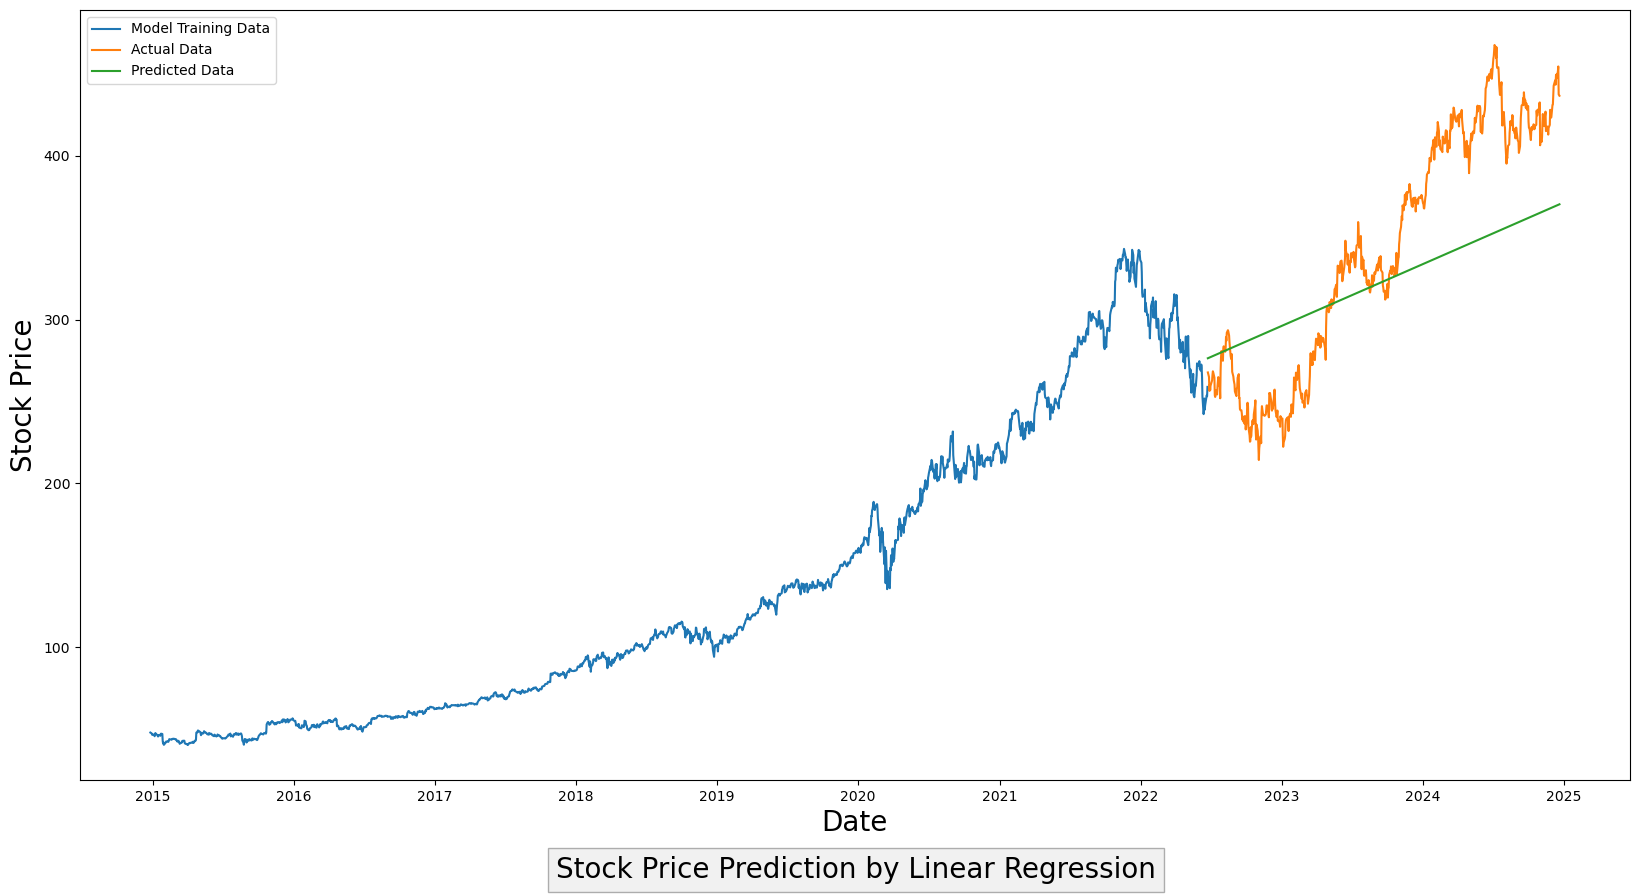

In [19]:
# Call the linear_regression_prediction function with the DataFrame 'df'
linear_regression_prediction(df)

### KNN

In [20]:
def k_nearest_neighbours_predict(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using k-nearest neighbors
    print('-------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-------------------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    
    # Reset index for training and validation sets
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    
    # Convert dates to ordinal values
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    
    # Scale the features
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    
    # Define parameters for grid search
    params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]}
    
    # Initialize K-NeighborsRegressor
    knn = neighbors.KNeighborsRegressor()
    
    # Perform grid search with cross-validation
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train, y_train)
    
    # Make predictions
    preds = model.predict(x_valid)
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((np.array(y_valid) - np.array(preds)), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Add 'Predictions' column to the validation set DataFrame
    valid_set['Predictions'] = preds
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    
    #Add Title
    plt.text(
        0.513, 0.02,  # Position below the graph
        'Stock Price Prediction by K-Nearest Neighbors',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
    # Display the validation set DataFrame
    print(valid_set)
    
    # Show the plot
    plt.show()


-------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-------------------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
RMSE value on validation set: 211.4486656479439
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2022-06-24  267.700012    47.665001
2022-06-27  264.890015    45.990002
2022-06-28  256.480011    46.910000
2022-06-29  260.260010    46.894999
2022-06-30  256.829987    46.160000
...                ...          ...
2024-12-16  451.589996   258.890007
2024-12-17  454.459991   243.375000
2024-12-18  437.390015   246.309998
2024-12-19  437.029999   253.435005
2024-12-20  436.600006   255.994995

[628 rows x 2 columns]


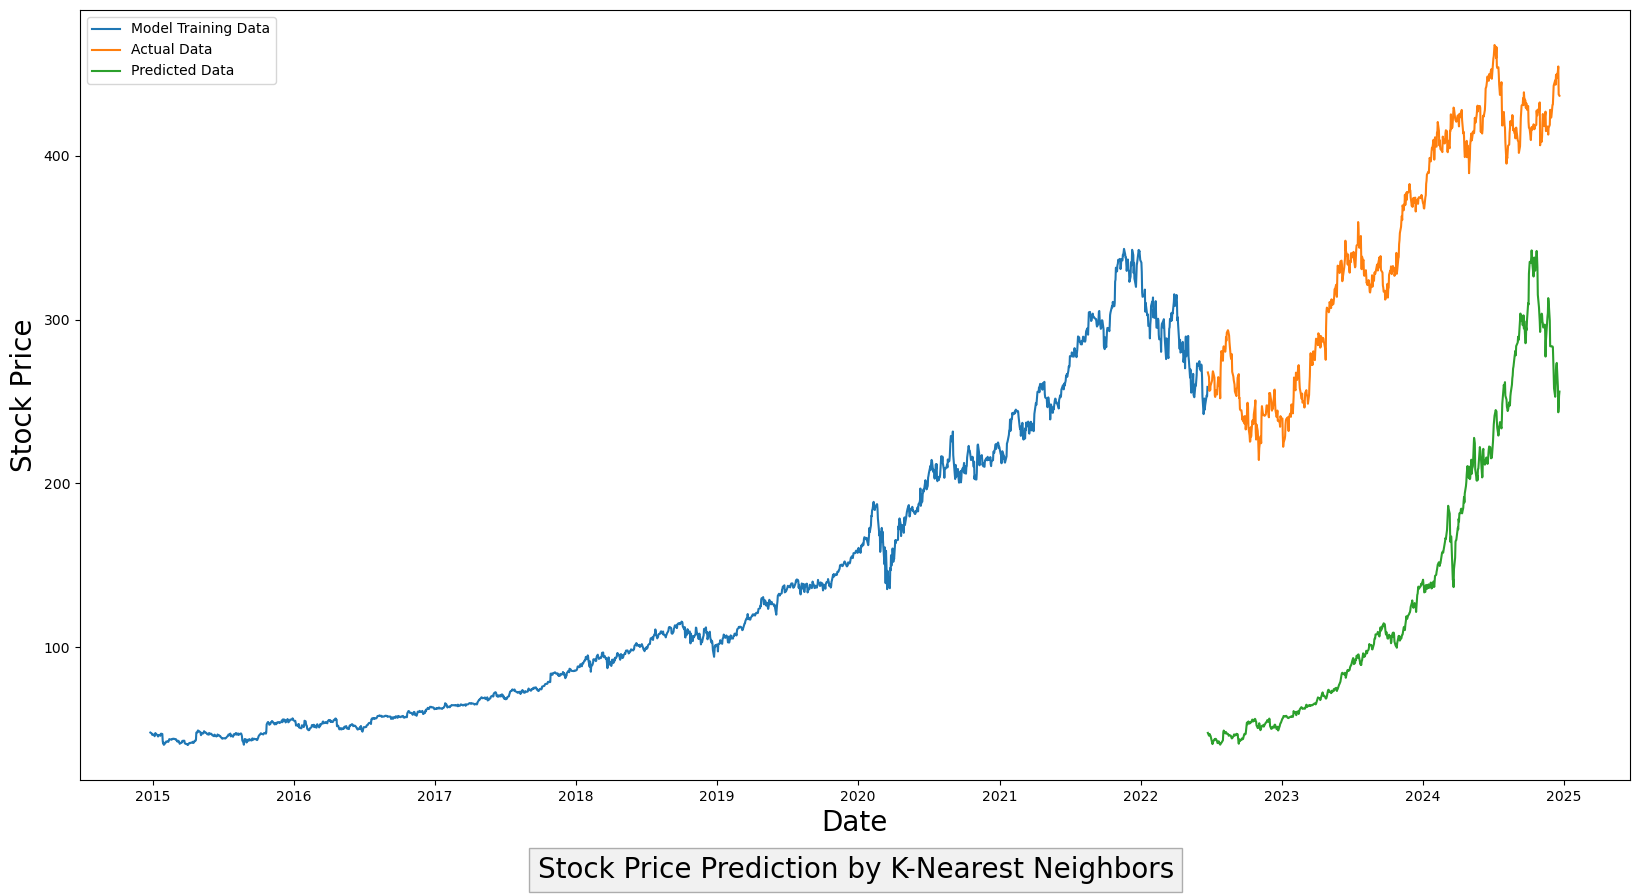

In [21]:
# Call the k_nearest_neighbours_predict function with the DataFrame 'df'
k_nearest_neighbours_predict(df)

### LSTM

In [24]:
def lstm_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]

    # Convert DataFrame to numpy array
    dataset = df_new.values
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train = df_new[:ceil(shape * 0.75)]
    valid = df_new[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using LSTM
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train.shape)
    print('Shape of Validation Set', valid.shape)
    
    # Scale the data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Prepare the training data
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    
    # Prepare the test data
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Make predictions
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((valid - closing_price), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Add 'Predictions' column to the validation set DataFrame
    valid['Predictions'] = closing_price
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    
    #Add Title
    plt.text(
        0.513, 0.02,  # Position below the graph
        'Stock Price Prediction by Long Short Term Memory (LSTM)',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
    # Display the validation set DataFrame
    print(valid)
    
    # Show the plot
    plt.show()
    
    # Return the trained LSTM model
    return model


-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
1846/1846 - 33s - 18ms/step - loss: 9.2636e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
RMSE value on validation set: 16.079514916929625
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2022-06-24  267.700012   250.076859
2022-06-27  264.890015   251.460526
2022-06-28  256.480011   253.082047
2022-06-29  260.260010   254.025742
2022-06-30  256.829987   254.867416
...                ...          ...
2024-12-16  451.589996   420.991791
2024-12-17  454.459991   422.364441
2024-12-18  437.390015   423.812439
2024-12-19  437.029999   423.631866
2024-12-20  4

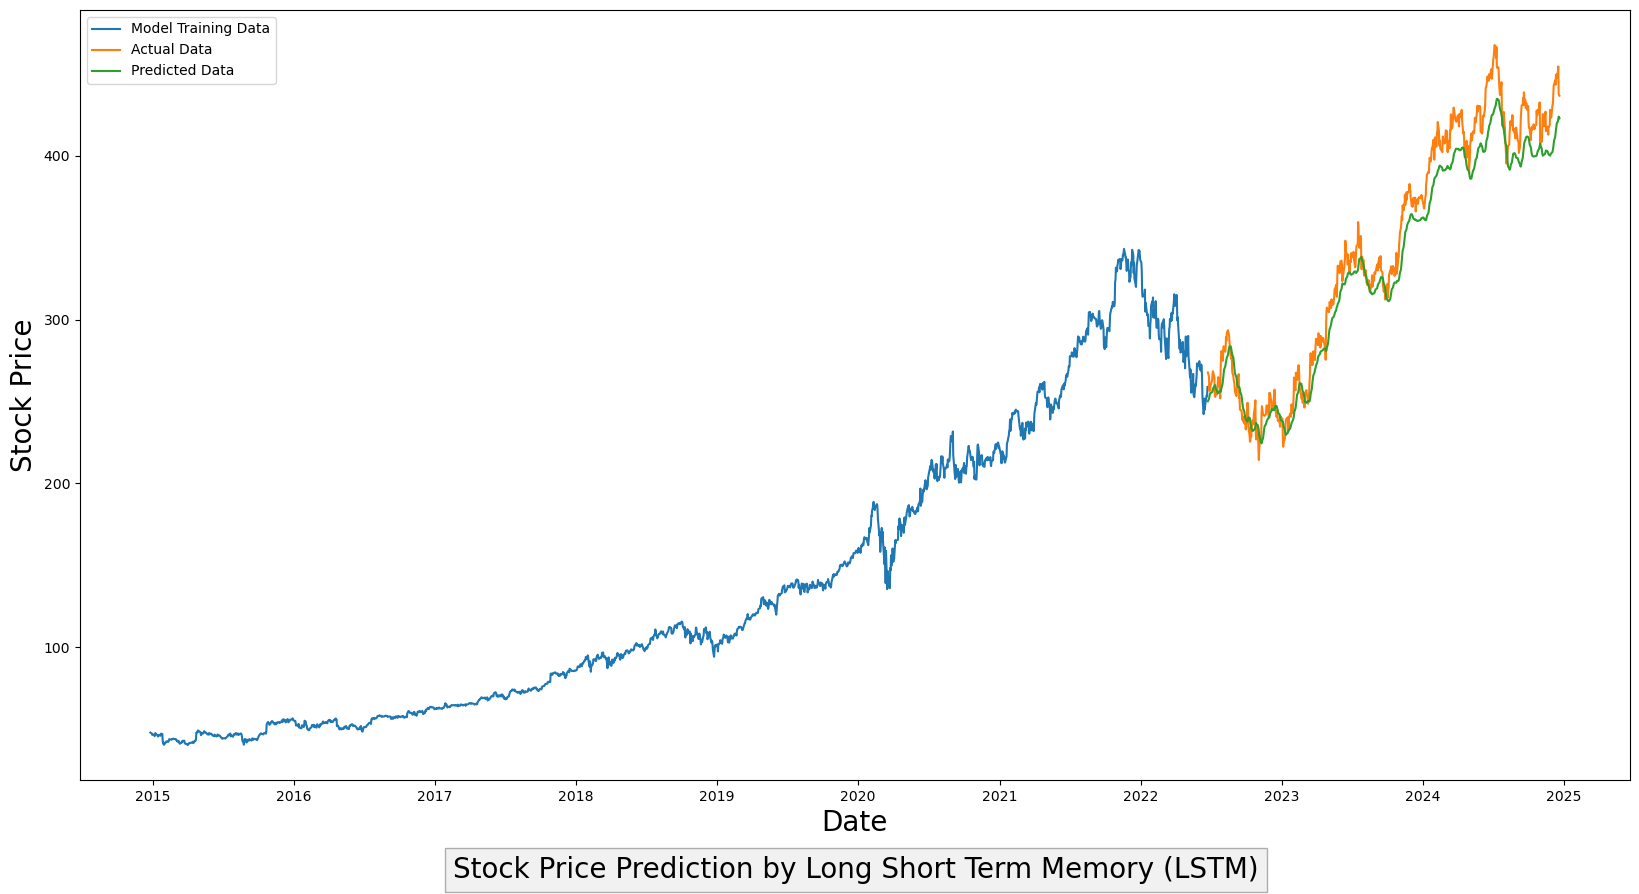

In [25]:
# Call the lstm_prediction function with the DataFrame 'df'
mod=lstm_prediction(df)

### ANN

In [26]:
def ann_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]

    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]

    # Split the data into training and validation sets (75% training, 25% validation)
    train = df_new[:ceil(shape * 0.75)]
    valid = df_new[ceil(shape * 0.75):]

    # Print header for stock price prediction using ANN
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY ARTIFICIAL NEURAL NETWORK (ANN)---------')
    print('-----------------------------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train.shape)
    print('Shape of Validation Set', valid.shape)

    # Scale the data using MinMaxScaler
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df_new)

    # Prepare the training data
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    # Prepare the test data
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)

    # Build the Artificial Neural Network model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, LSTM
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    rms = np.sqrt(np.mean(np.power((valid['Close'] - predictions.flatten()), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')

    # Add 'Predictions' column to the validation set DataFrame
    valid['Predictions'] = predictions

    # Plot the model training data, actual data, and predicted data
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

    #Add Title
    plt.text(
        0.513, 0.02,  # Position below the graph
        'Stock Price Prediction by Artificial Neural Network (ANN)',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
    # Display the validation set DataFrame
    print(valid)

    # Show the plot
    plt.show()
    
    # Return the trained ANN model
    return model


-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY ARTIFICIAL NEURAL NETWORK (ANN)---------
-----------------------------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
1846/1846 - 6s - 3ms/step - loss: 8.7217e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE value on validation set: 15.282767865675199
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2022-06-24  267.700012   271.631195
2022-06-27  264.890015   268.673828
2022-06-28  256.480011   266.942017
2022-06-29  260.260010   265.545380
2022-06-30  256.829987   268.115265
...                ...          ...
2024-12-16  451.589996   453.573303
2024-12-17  454.459991   454.937073
2024-12-18  437.390015   454.038544
2024-12-19  437.029999   455.075623
2024-12-20  436.

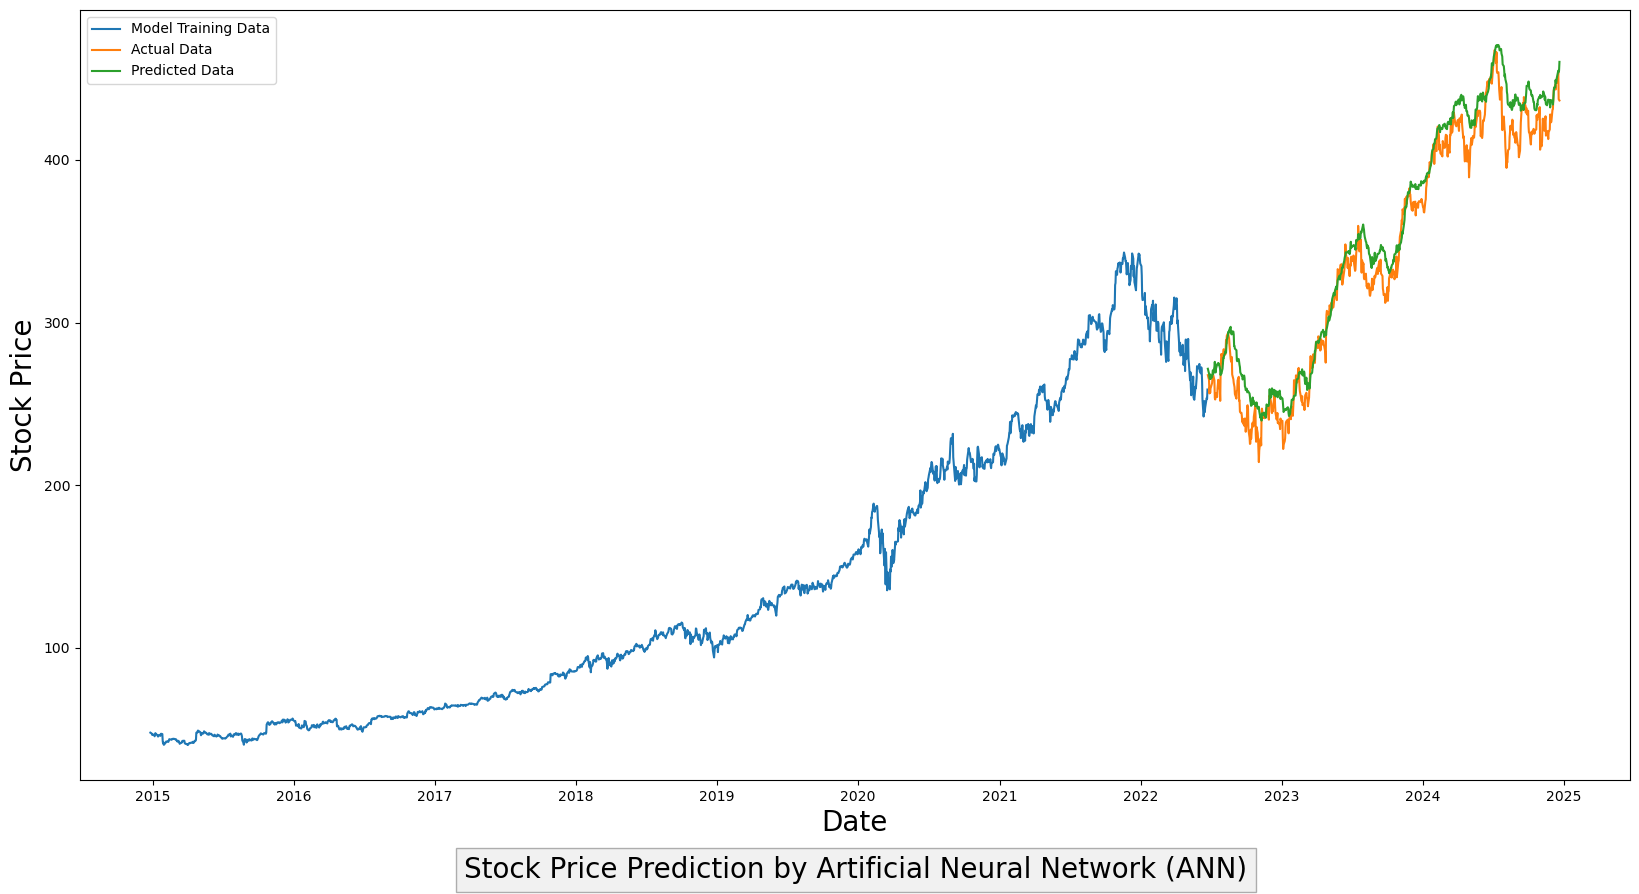

In [27]:
# Call the ann_prediction function with the DataFrame 'df'
mod1 = ann_prediction(df)

### FNN

In [28]:
def fnn_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]

    # Convert DataFrame to numpy array
    dataset = df_new.values
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train = df_new[:ceil(shape * 0.75)]
    valid = df_new[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using Feedforward Neural Network (FNN)
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY FEEDFORWARD NEURAL NETWORK (FNN)-----------')
    print('-----------------------------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train.shape)
    print('Shape of Validation Set', valid.shape)
    
    # Scale the data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Prepare the training data
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    # Prepare the test data
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)
    
    # Build the Feedforward Neural Network model
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))  # First hidden layer
    model.add(Dense(units=64, activation='relu'))  # Second hidden layer
    model.add(Dense(units=32, activation='relu'))  # Third hidden layer
    model.add(Dense(1))  # Output layer
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((valid['Close'] - predictions.flatten()), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Add 'Predictions' column to the validation set DataFrame
    valid['Predictions'] = predictions
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    
    #Add Title
    plt.text(
        0.513, 0.02,  # Position below the graph
        'Stock Price Prediction by Feedforward Neural Network (FNN)',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
    # Display the validation set DataFrame
    print(valid)
    
    # Show the plot
    plt.show()
    
    # Return the trained Feedforward Neural Network model
    return model


-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY FEEDFORWARD NEURAL NETWORK (FNN)-----------
-----------------------------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
1846/1846 - 5s - 3ms/step - loss: 9.9034e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE value on validation set: 12.23692430275928
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2022-06-24  267.700012   263.730927
2022-06-27  264.890015   264.145233
2022-06-28  256.480011   264.473206
2022-06-29  260.260010   266.013641
2022-06-30  256.829987   266.907013
...                ...          ...
2024-12-16  451.589996   434.234528
2024-12-17  454.459991   434.021881
2024-12-18  437.390015   436.613525
2024-12-19  437.029999   437.132568
2024-12-20  43

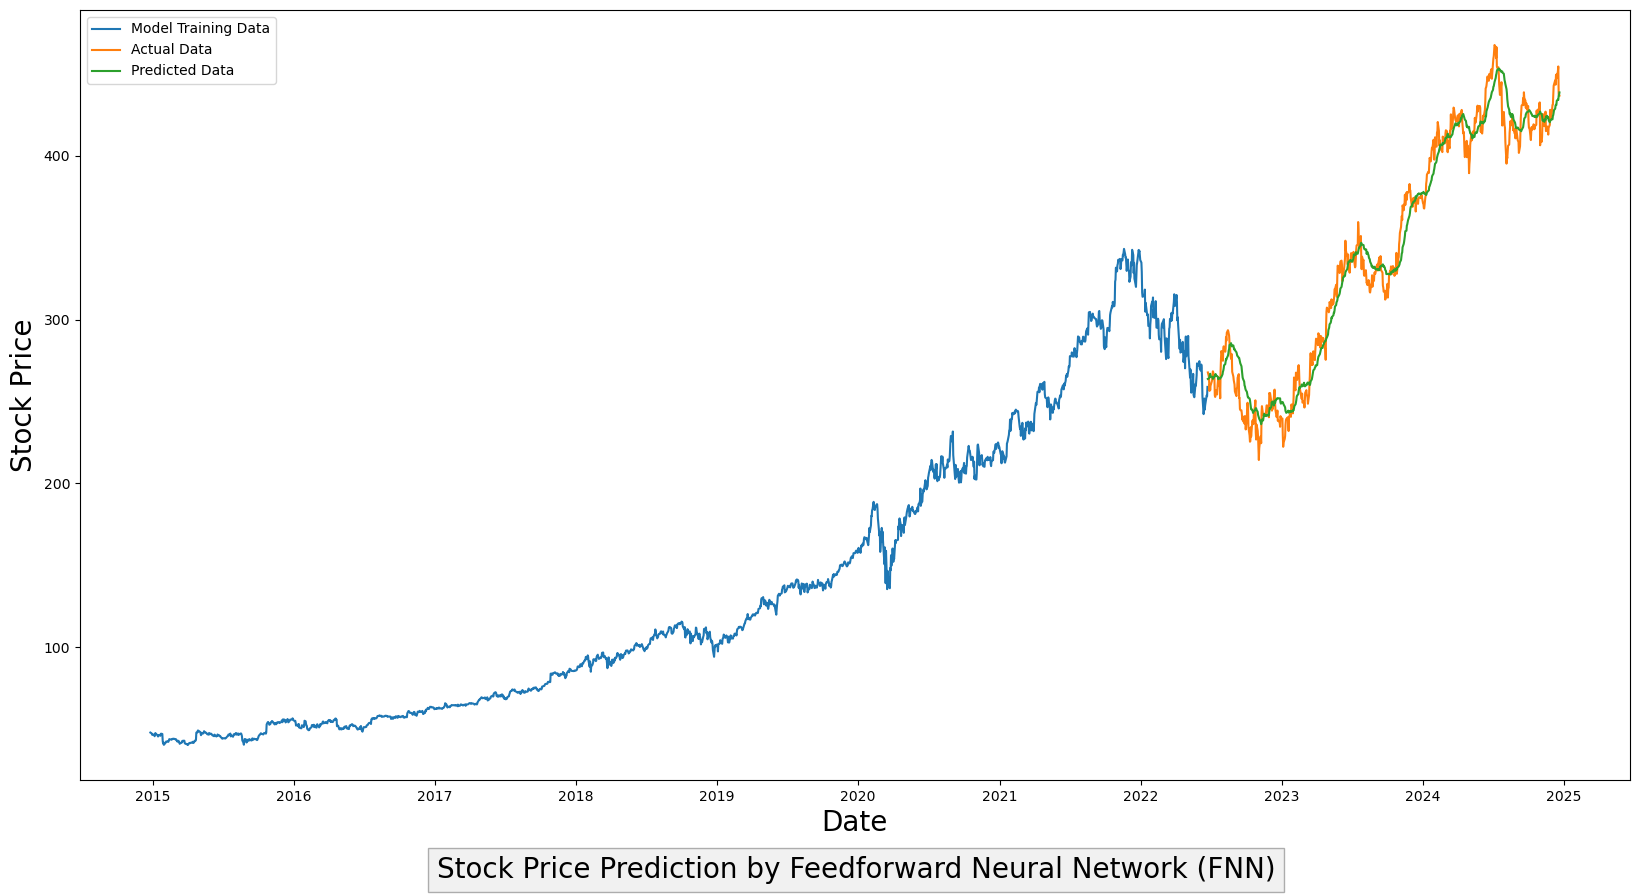

In [29]:
# Call the fnn_prediction function with the DataFrame 'df'
mod2 = fnn_prediction(df)

### LSTM & ANN

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def lstm_prediction(df):
    shape = df.shape[0]
    df_new = df[['Close']]
    dataset = df_new.values
    train = df_new[:ceil(shape * 0.75)]
    valid = df_new[ceil(shape * 0.75):]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Prepare training data for LSTM
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    
    # Prepare the test data for LSTM
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Make predictions using LSTM
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    return valid, closing_price, model, scaler

def ann_prediction(df):
    shape = df.shape[0]
    df_new = df[['Close']]
    train = df_new[:ceil(shape * 0.75)]
    valid = df_new[ceil(shape * 0.75):]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df_new)

    # Prepare training data for ANN
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    # Prepare the test data for ANN
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)
    
    # Build ANN model
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

    # Make predictions using ANN
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    return valid, predictions, model, scaler

def ensemble_prediction(df):
    # Get predictions and models from both LSTM and ANN
    valid_lstm, closing_price_lstm, lstm_model, lstm_scaler = lstm_prediction(df)
    valid_ann, predictions_ann, ann_model, ann_scaler = ann_prediction(df)
    
    # Combine predictions (simple average)
    ensemble_predictions = (closing_price_lstm + predictions_ann) / 2

    # Calculate RMSE for the ensemble model
    rms = np.sqrt(np.mean(np.power((valid_lstm['Close'].values - ensemble_predictions.flatten()), 2)))
    print('RMSE value on validation set for ensemble:', rms)
    print('-----------------------------------------------------------')

    # Add 'Ensemble Predictions' column to the validation set
    valid_lstm['Ensemble Predictions'] = ensemble_predictions

    # Plot actual vs ensemble predictions
    plt.plot(valid_lstm['Close'], label='Actual Data')
    plt.plot(valid_lstm['Ensemble Predictions'], label='Ensemble Predictions')
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.legend()
    
    #Add Title
    plt.text(
        0.513, 0.02,  # Position below the graph
        'Stock Price Prediction by by Ensemble (LSTM + ANN)',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
    plt.show()

    # Display the validation set with predictions
    print(valid_lstm)

    # Return the final ensemble model which includes both LSTM and ANN models
    final_model = {'LSTM': lstm_model, 'ANN': ann_model, 'Scaler_LSTM': lstm_scaler, 'Scaler_ANN': ann_scaler}
    return final_model


1846/1846 - 35s - 19ms/step - loss: 6.7760e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
1846/1846 - 4s - 2ms/step - loss: 7.6626e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE value on validation set for ensemble: 11.011374125505172
-----------------------------------------------------------


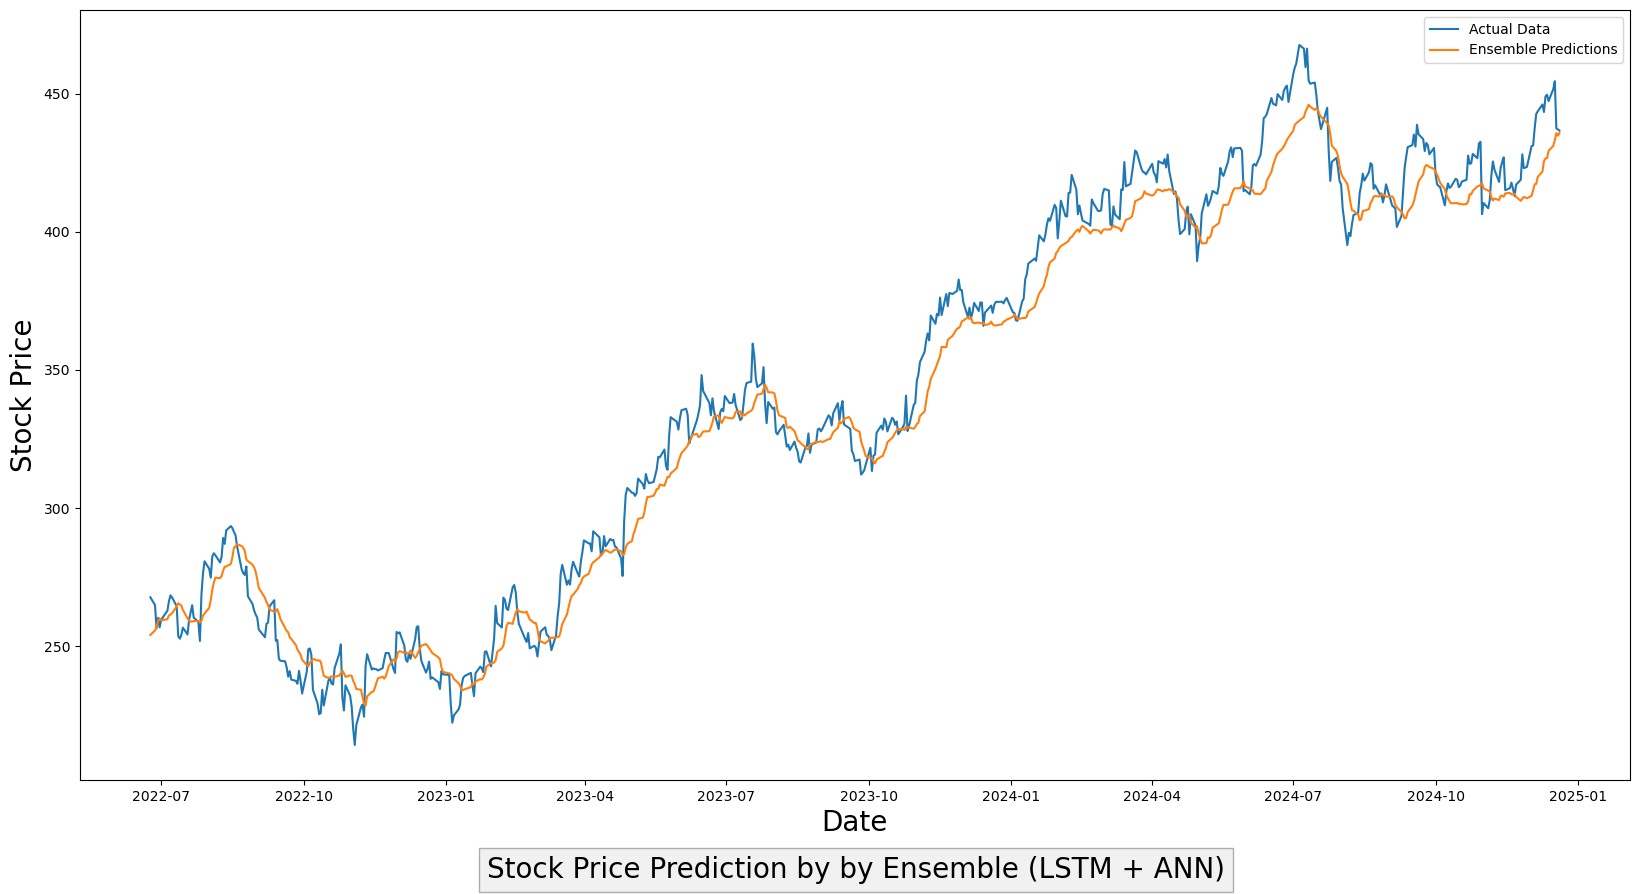

[*********************100%%**********************]  1 of 1 completed

                 Close  Ensemble Predictions
Date                                        
2022-06-24  267.700012            254.077545
2022-06-27  264.890015            255.664612
2022-06-28  256.480011            257.009949
2022-06-29  260.260010            259.259277
2022-06-30  256.829987            260.072693
...                ...                   ...
2024-12-16  451.589996            431.048798
2024-12-17  454.459991            433.068604
2024-12-18  437.390015            435.672180
2024-12-19  437.029999            434.760376
2024-12-20  436.600006            435.784790

[628 rows x 2 columns]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted future price for MSFT stock is: 435.5896911621094


In [31]:
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Function to predict price from the ensemble model
def predict_price_from_ensemble(df, final_model, ticker):
    # Extract the models and scalers from the final ensemble model
    lstm_model = final_model['LSTM']
    ann_model = final_model['ANN']
    lstm_scaler = final_model['Scaler_LSTM']
    ann_scaler = final_model['Scaler_ANN']

    # Download historical stock data for the specified ticker from Yahoo Finance
    msft_quote = yf.download(ticker, start=start_date_str, end=end_date_str)

    # Create a new DataFrame containing only the 'Close' prices
    df_new = msft_quote.filter(['Close'])

    # Convert DataFrame to numpy array
    dataset = df_new.values

    # Scale the data using MinMaxScaler
    scaled_data = lstm_scaler.fit_transform(dataset)  # We use LSTM scaler for consistency

    # Get the closing prices for the last 40 days (adjust this according to model's training period)
    last_40_days = df_new[-40:].values

    # Scale the last 40 days' closing prices using the same scaler
    last_40_days_scaled = lstm_scaler.transform(last_40_days)

    # Create an empty list to store the test data
    X_test = []

    # Add the scaled last 40 days' closing prices to the test data list
    X_test.append(last_40_days_scaled)

    # Convert the test data list into a numpy array (for LSTM)
    X_test = np.array(X_test)

    # Reshape for LSTM model (LSTM expects 3D input)
    X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Predict using LSTM model
    lstm_prediction = lstm_model.predict(X_test_lstm)
    lstm_prediction = lstm_scaler.inverse_transform(lstm_prediction)

    # Now prepare the test data for the ANN model
    X_test_ann = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))  # For ANN, we need 2D array

    # Predict using ANN model
    ann_prediction = ann_model.predict(X_test_ann)
    ann_prediction = ann_scaler.inverse_transform(ann_prediction)

    # Ensemble Prediction (simple average of both models)
    ensemble_prediction = (lstm_prediction + ann_prediction) / 2

    # Print the predicted price
    print(f"Predicted future price for {ticker} stock is: {ensemble_prediction[0][0]}")
    return ensemble_prediction

# Example usage
final_model = ensemble_prediction(df)  # Assuming you already have your final ensemble model
predicted_price = predict_price_from_ensemble(df, final_model, ticker)


### LSTM & FNN

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def lstm_prediction(df):
    shape = df.shape[0]
    df_new = df[['Close']]
    dataset = df_new.values
    train = df_new[:ceil(shape * 0.75)]
    valid = df_new[ceil(shape * 0.75):]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Prepare training data for LSTM
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    
    # Prepare the test data for LSTM
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Make predictions using LSTM
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    return valid, closing_price, model, scaler

def fnn_prediction(df):
    shape = df.shape[0]
    df_new = df[['Close']]
    train = df_new[:ceil(shape * 0.75)]
    valid = df_new[ceil(shape * 0.75):]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df_new)

    # Prepare training data for ANN
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    # Prepare the test data for ANN
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)
    
    # Build ANN model
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

    # Make predictions using ANN
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    return valid, predictions, model, scaler

def ensemble_prediction(df):
    # Get predictions and models from both LSTM and ANN
    valid_lstm, closing_price_lstm, lstm_model, lstm_scaler = lstm_prediction(df)
    valid_ann, predictions_ann, ann_model, ann_scaler = fnn_prediction(df)
    
    # Combine predictions (simple average)
    ensemble_predictions = (closing_price_lstm + predictions_ann) / 2

    # Calculate RMSE for the ensemble model
    rms = np.sqrt(np.mean(np.power((valid_lstm['Close'].values - ensemble_predictions.flatten()), 2)))
    print('RMSE value on validation set for ensemble:', rms)
    print('-----------------------------------------------------------')

    # Add 'Ensemble Predictions' column to the validation set
    valid_lstm['Ensemble Predictions'] = ensemble_predictions

    # Plot actual vs ensemble predictions
    plt.plot(valid_lstm['Close'], label='Actual Data')
    plt.plot(valid_lstm['Ensemble Predictions'], label='Ensemble Predictions')
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.legend()
    
    #Add Title
    plt.text(
        0.513, 0.02,  # Position below the graph
        'Stock Price Prediction by by Ensemble (LSTM + FNN)',
        fontsize=20, ha='center', va='center',
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="lightgray", alpha=0.3),
        transform=plt.gcf().transFigure
    )
    plt.show()

    # Display the validation set with predictions
    print(valid_lstm)

    # Return the final ensemble model which includes both LSTM and ANN models
    final_model = {'LSTM': lstm_model, 'ANN': ann_model, 'Scaler_LSTM': lstm_scaler, 'Scaler_ANN': ann_scaler}
    return final_model


1846/1846 - 35s - 19ms/step - loss: 9.7685e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
1846/1846 - 5s - 3ms/step - loss: 0.0012
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE value on validation set for ensemble: 10.208410122663176
-----------------------------------------------------------


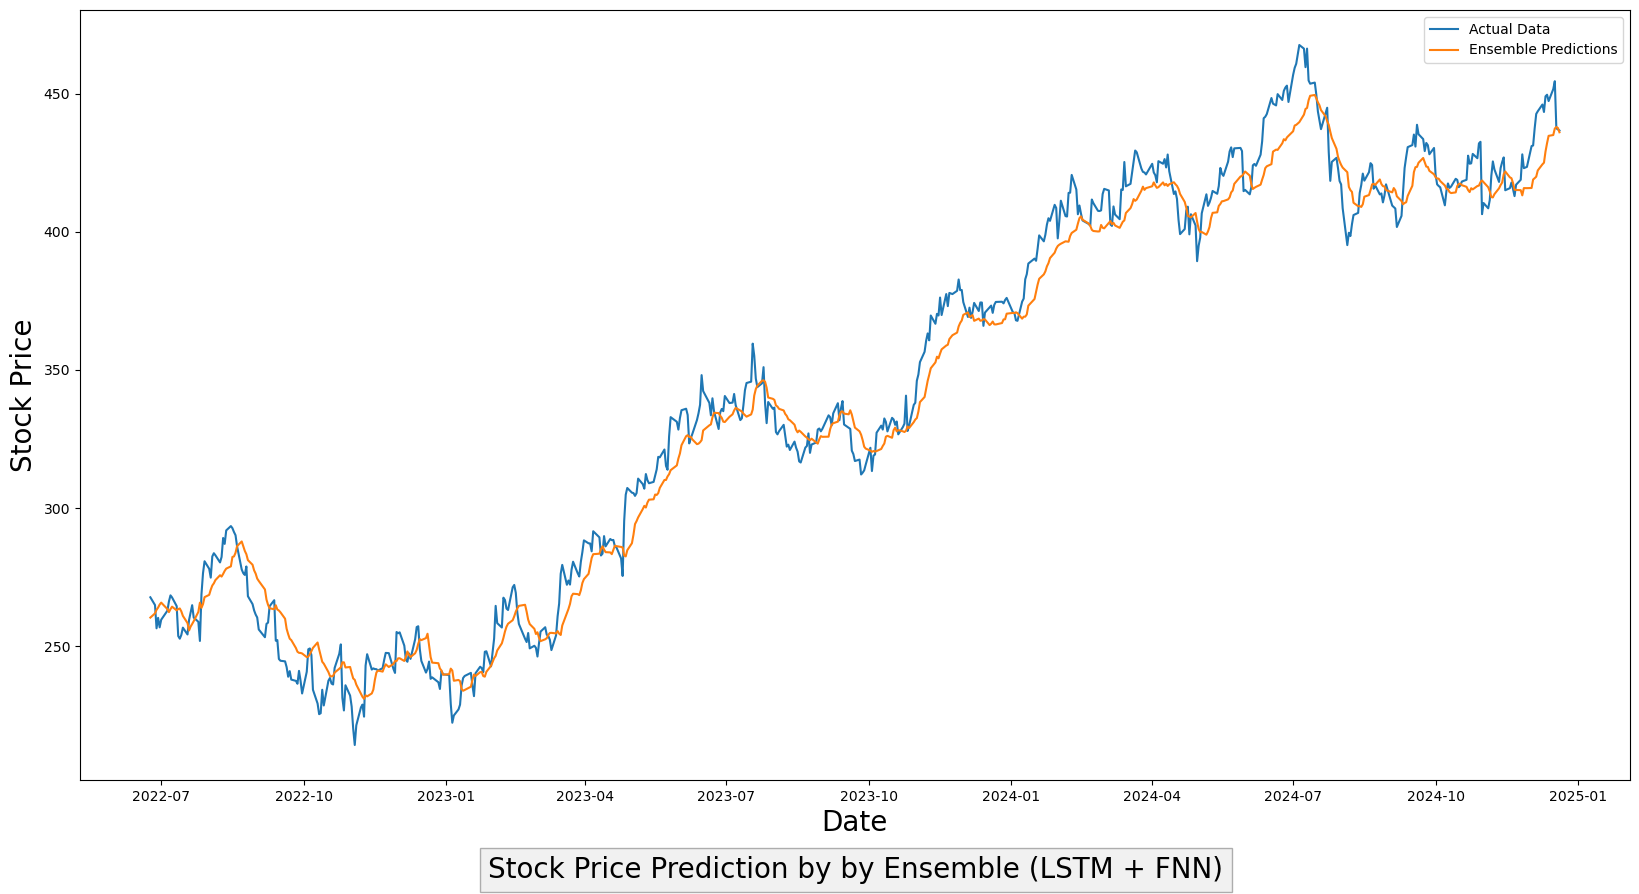

[*********************100%%**********************]  1 of 1 completed

                 Close  Ensemble Predictions
Date                                        
2022-06-24  267.700012            260.356628
2022-06-27  264.890015            261.868988
2022-06-28  256.480011            263.172729
2022-06-29  260.260010            263.982056
2022-06-30  256.829987            265.057007
...                ...                   ...
2024-12-16  451.589996            434.977173
2024-12-17  454.459991            437.327637
2024-12-18  437.390015            437.874268
2024-12-19  437.029999            437.547485
2024-12-20  436.600006            435.982788

[628 rows x 2 columns]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted future price for MSFT stock is: 434.4541320800781


In [33]:
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Function to predict price from the ensemble model
def predict_price_from_ensemble(df, final_model, ticker):
    # Extract the models and scalers from the final ensemble model
    lstm_model = final_model['LSTM']
    ann_model = final_model['ANN']
    lstm_scaler = final_model['Scaler_LSTM']
    ann_scaler = final_model['Scaler_ANN']

    # Download historical stock data for the specified ticker from Yahoo Finance
    msft_quote = yf.download(ticker, start=start_date_str, end=end_date_str)

    # Create a new DataFrame containing only the 'Close' prices
    df_new = msft_quote.filter(['Close'])

    # Convert DataFrame to numpy array
    dataset = df_new.values

    # Scale the data using MinMaxScaler
    scaled_data = lstm_scaler.fit_transform(dataset)  # We use LSTM scaler for consistency

    # Get the closing prices for the last 40 days (adjust this according to model's training period)
    last_40_days = df_new[-40:].values

    # Scale the last 40 days' closing prices using the same scaler
    last_40_days_scaled = lstm_scaler.transform(last_40_days)

    # Create an empty list to store the test data
    X_test = []

    # Add the scaled last 40 days' closing prices to the test data list
    X_test.append(last_40_days_scaled)

    # Convert the test data list into a numpy array (for LSTM)
    X_test = np.array(X_test)

    # Reshape for LSTM model (LSTM expects 3D input)
    X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Predict using LSTM model
    lstm_prediction = lstm_model.predict(X_test_lstm)
    lstm_prediction = lstm_scaler.inverse_transform(lstm_prediction)

    # Now prepare the test data for the ANN model
    X_test_ann = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))  # For ANN, we need 2D array

    # Predict using ANN model
    ann_prediction = ann_model.predict(X_test_ann)
    ann_prediction = ann_scaler.inverse_transform(ann_prediction)

    # Ensemble Prediction (simple average of both models)
    ensemble_prediction = (lstm_prediction + ann_prediction) / 2

    # Print the predicted price
    print(f"Predicted future price for {ticker} stock is: {ensemble_prediction[0][0]}")
    return ensemble_prediction

# Example usage
final_model = ensemble_prediction(df)  # Assuming you already have your final ensemble model
predicted_price = predict_price_from_ensemble(df, final_model, ticker)


In [34]:
import os
os.remove(csv_filename) 